In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('BHP_data.csv')
df1.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.loc[df1.price > 3500,:]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,NaN,7150,13.0,NaN,3600.0


In [5]:
df1.drop([4162],inplace=True)

In [6]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [7]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] =df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [10]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df3[df3.bhk > 26]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
sqft_to_num('2006-1500')

1753.0

In [17]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(sqft_to_num)

In [18]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [19]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

In [20]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [21]:
df4 = df4.dropna()

In [22]:
df5 = df4.copy()
df5['price_per_sqft'] = df5.price*100000/df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
df5.location = df5.location.apply(lambda x : x.strip())
df5.location.value_counts()

Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Chikkabettahalli          1
1 Ramamurthy Nagar        1
singapura paradise        1
Kanakapura Main Road      1
Subhash Nagar             1
Name: location, Length: 1287, dtype: int64

In [24]:
locat = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
locat

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [25]:
len(locat[locat<=20])

1144

In [26]:
locat_less_than_20 = locat[locat<=20]
locat_less_than_20

location
Yelachenahalli          20
Poorna Pragna Layout    20
Binny Pete              20
HBR Layout              20
Sanjay nagar            20
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1144, dtype: int64

In [27]:
print(len(df5.location.unique()))
print(len(locat_less_than_20))

1287
1144


In [28]:
df5.location = df5.location.apply(lambda x : 'other' if x in locat_less_than_20 else x)

In [29]:
len(df5.location.unique())

144

In [30]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

In [33]:
df6.price_per_sqft.describe()

count     12455.000000
mean       6306.658008
std        4163.206087
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
df6.price.describe()

count    12455.000000
mean       111.032294
std        151.214651
min          9.000000
25%         49.000000
50%         70.000000
75%        115.000000
max       3600.000000
Name: price, dtype: float64

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10429, 7)

In [36]:
df7.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667


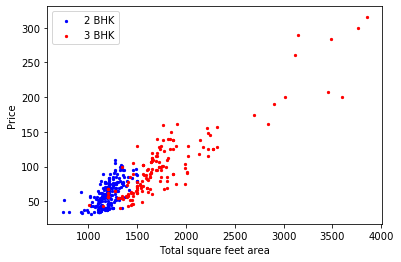

In [37]:
def plot_scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft, bhk2.price,color = 'blue',label='2 BHK',s=5)
    plt.scatter(bhk3.total_sqft, bhk3.price,color = 'red',label='3 BHK',s=5)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.legend()
    
plot_scatter_plot(df7,"Whitefield")

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std' :np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqft) < (stats['mean'])].index.values) 
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(6971, 7)

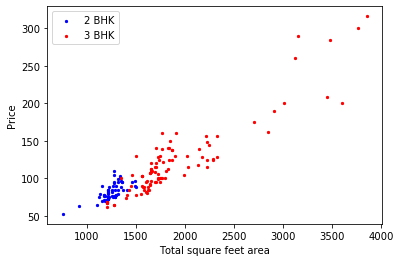

In [39]:
plot_scatter_plot(df8,"Whitefield")

Text(0, 0.5, 'Count')

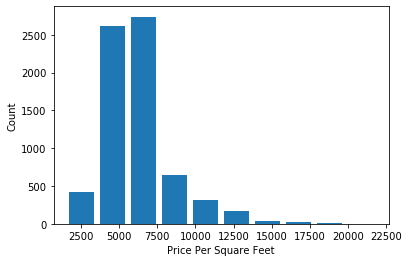

In [40]:
import matplotlib
plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [41]:
df8.bath.unique()

array([ 3.,  5.,  4.,  2.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7819,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
7962,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9040,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9213,other,10 BHK,4000.0,12.0,160.0,10,4000.000000
9552,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

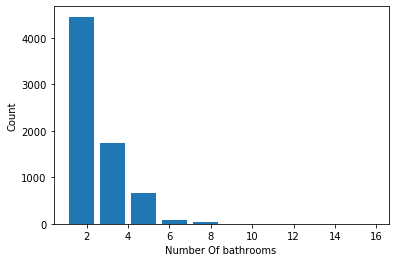

In [43]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number Of bathrooms")
plt.ylabel("Count")

In [44]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5810,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7697,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9913,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [45]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6892, 7)

In [46]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2


In [47]:
dummies = pd.get_dummies(df10.location)
dummies.head(2)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11 =pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.drop('location',axis='columns',inplace=True)
df11.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,85.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.0,3.0,225.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = df11.drop('price',axis='columns')
y = df11['price']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [51]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
lin_model.score(X_test,y_test)

0.851661005564732

In [52]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
cross_val_score(lin_model,X,y,cv=cv)

array([0.85100303, 0.84624686, 0.85109736, 0.81782712, 0.81745157])

In [53]:
def find_best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{'normalize':[True,False]}
                            },
        'lasso':{
            'model':Lasso(),
            'params':{'alpha':[1,2],'selection':['random','cyclic']}
                },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.836725,{'normalize': True}
1,lasso,0.747924,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.713399,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [54]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Vidyaranyapura', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur'],
      dtype='object', length=146)

In [66]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lin_model.predict([x])[0]

In [69]:
with open('model.pkl','wb') as f:
    pickle.dump(lin_model,f)
# pickle.dump(lin_model,open('model.pkl','wb'))

In [70]:
predict_price('Whitefield','2000','3','2')

136.3305239546437

In [ ]:
# model = pickle.load(open('model.pkl','rb'))
# print(lin_model.predict('Whitefield','2000','3','2'))

In [72]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))